# Л.Р. №2


Для данной л.р. было принято решение оставить датасет из первой л.р.

## Добавление новых атрибутов


Добавим атрибут "AVERAGE" представляющий собой среднюю годовую температуру

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans
from scipy import stats

data_frame = pd.read_csv("../ML_lab2_1376_Osipov/temperatures.csv")

In [15]:
selected_columns = ['YEAR', 'JAN', 'FEB', 'MAR',
                    'APR', 'MAY', 'JUN',
                    'JUL', 'AUG', 'SEP',
                    'OCT', 'NOV', 'DEC']

data = data_frame[selected_columns]

In [17]:
data['AVERAGE'] = (data['JAN'] + data['FEB'] + data['MAR'] + data['APR'] + data['MAY'] + data['JUN'] + data['JUL'] + data['AUG'] + data['SEP'] + data['OCT'] + data['NOV'] + data['DEC']) / 12
data.head(5)

C:\Users\79117\AppData\Local\Temp\ipykernel_13928\715751827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AVERAGE'] = (data['JAN'] + data['FEB'] + data['MAR'] + data['APR'] + data['MAY'] + data['JUN'] + data['JUL'] + data['AUG'] + data['SEP'] + data['OCT'] + data['NOV'] + data['DEC']) / 12


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,AVERAGE
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.995833
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.218333
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.628333
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.487500
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.528333


## Очистим датасет

### Найдём и удалим выбросы

In [18]:
# Выбор числовых признаков для анализа выбросов
features_to_analyze = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC", "AVERAGE"]

# Функция для определения выбросов по стандартным отклонениям
def find_outliers_std(series):
    std_dev = series.std()  # Стандартное отклонение
    mean = series.mean()  # Среднее значение
    threshold = 3  # Пороговое значение для выбросов (обычно используется ±3 стандартных отклонения)

    outliers = (series > mean + threshold * std_dev) | (series < mean - threshold * std_dev)
    return outliers.sum()

# Подсчет количества выбросов для каждого числового признака
for feature in features_to_analyze:
    outliers_count = find_outliers_std(data[feature])
    print(f"Количество выбросов по признаку '{feature}': {outliers_count}")

Количество выбросов по признаку 'JAN': 2
Количество выбросов по признаку 'FEB': 3
Количество выбросов по признаку 'MAR': 2
Количество выбросов по признаку 'APR': 2
Количество выбросов по признаку 'MAY': 2
Количество выбросов по признаку 'JUN': 0
Количество выбросов по признаку 'JUL': 1
Количество выбросов по признаку 'AUG': 0
Количество выбросов по признаку 'SEP': 1
Количество выбросов по признаку 'OCT': 2
Количество выбросов по признаку 'NOV': 2
Количество выбросов по признаку 'DEC': 2
Количество выбросов по признаку 'AVERAGE': 2


Удалим найденные выбросы

In [19]:
# Функция для удаления выбросов по стандартным отклонениям
def remove_outliers_std(df, column):
    std_dev = df[column].std()  # Стандартное отклонение
    mean = df[column].mean()  # Среднее значение
    threshold = 3  # Пороговое значение для выбросов (обычно используется ±3 стандартных отклонения)

    df = df[(df[column] <= mean + threshold * std_dev) & (df[column] >= mean - threshold * std_dev)]
    return df

# Удаление выбросов для каждого числового признака
for feature in features_to_analyze:
    data = remove_outliers_std(data, feature)

### Найдём и удалим дубликаты

In [20]:
# Подсчет количества дубликатов во всем датасете
duplicates_count = data.duplicated().sum()

print(f"Количество дубликатов в датасете: {duplicates_count}")

Количество дубликатов в датасете: 0


### Обработаем пропущенные значения

In [21]:
# Подсчет количества пропущенных значений в каждом столбце
missing_values_count = data.isnull().sum()

print(f"Количество пропущенных значений в каждом столбце: {duplicates_count}")

Количество пропущенных значений в каждом столбце: 0


### Найдём кривые данные

In [22]:
# Вычисляем z-оценки для каждого признака
z_scores = np.abs((data[features_to_analyze] - data[features_to_analyze].mean()) / data[features_to_analyze].std())

# Определяем порог z-оценки, при котором считаем данные выбросами (обычно порог 3)
threshold = 3

# Удаляем строки с выбросами
num_before = len(data)
data = data[(z_scores < threshold).all(axis=1)]
num_after = len(data)

# Выводим информацию о количестве удаленных строк
removed_outliers = num_before - num_after
print(f'Удалено "кривых" данных: {removed_outliers}')

Удалено "кривых" данных: 1


## Определение числа кластеров (число k)

### Графический метод

C:\Users\79117\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


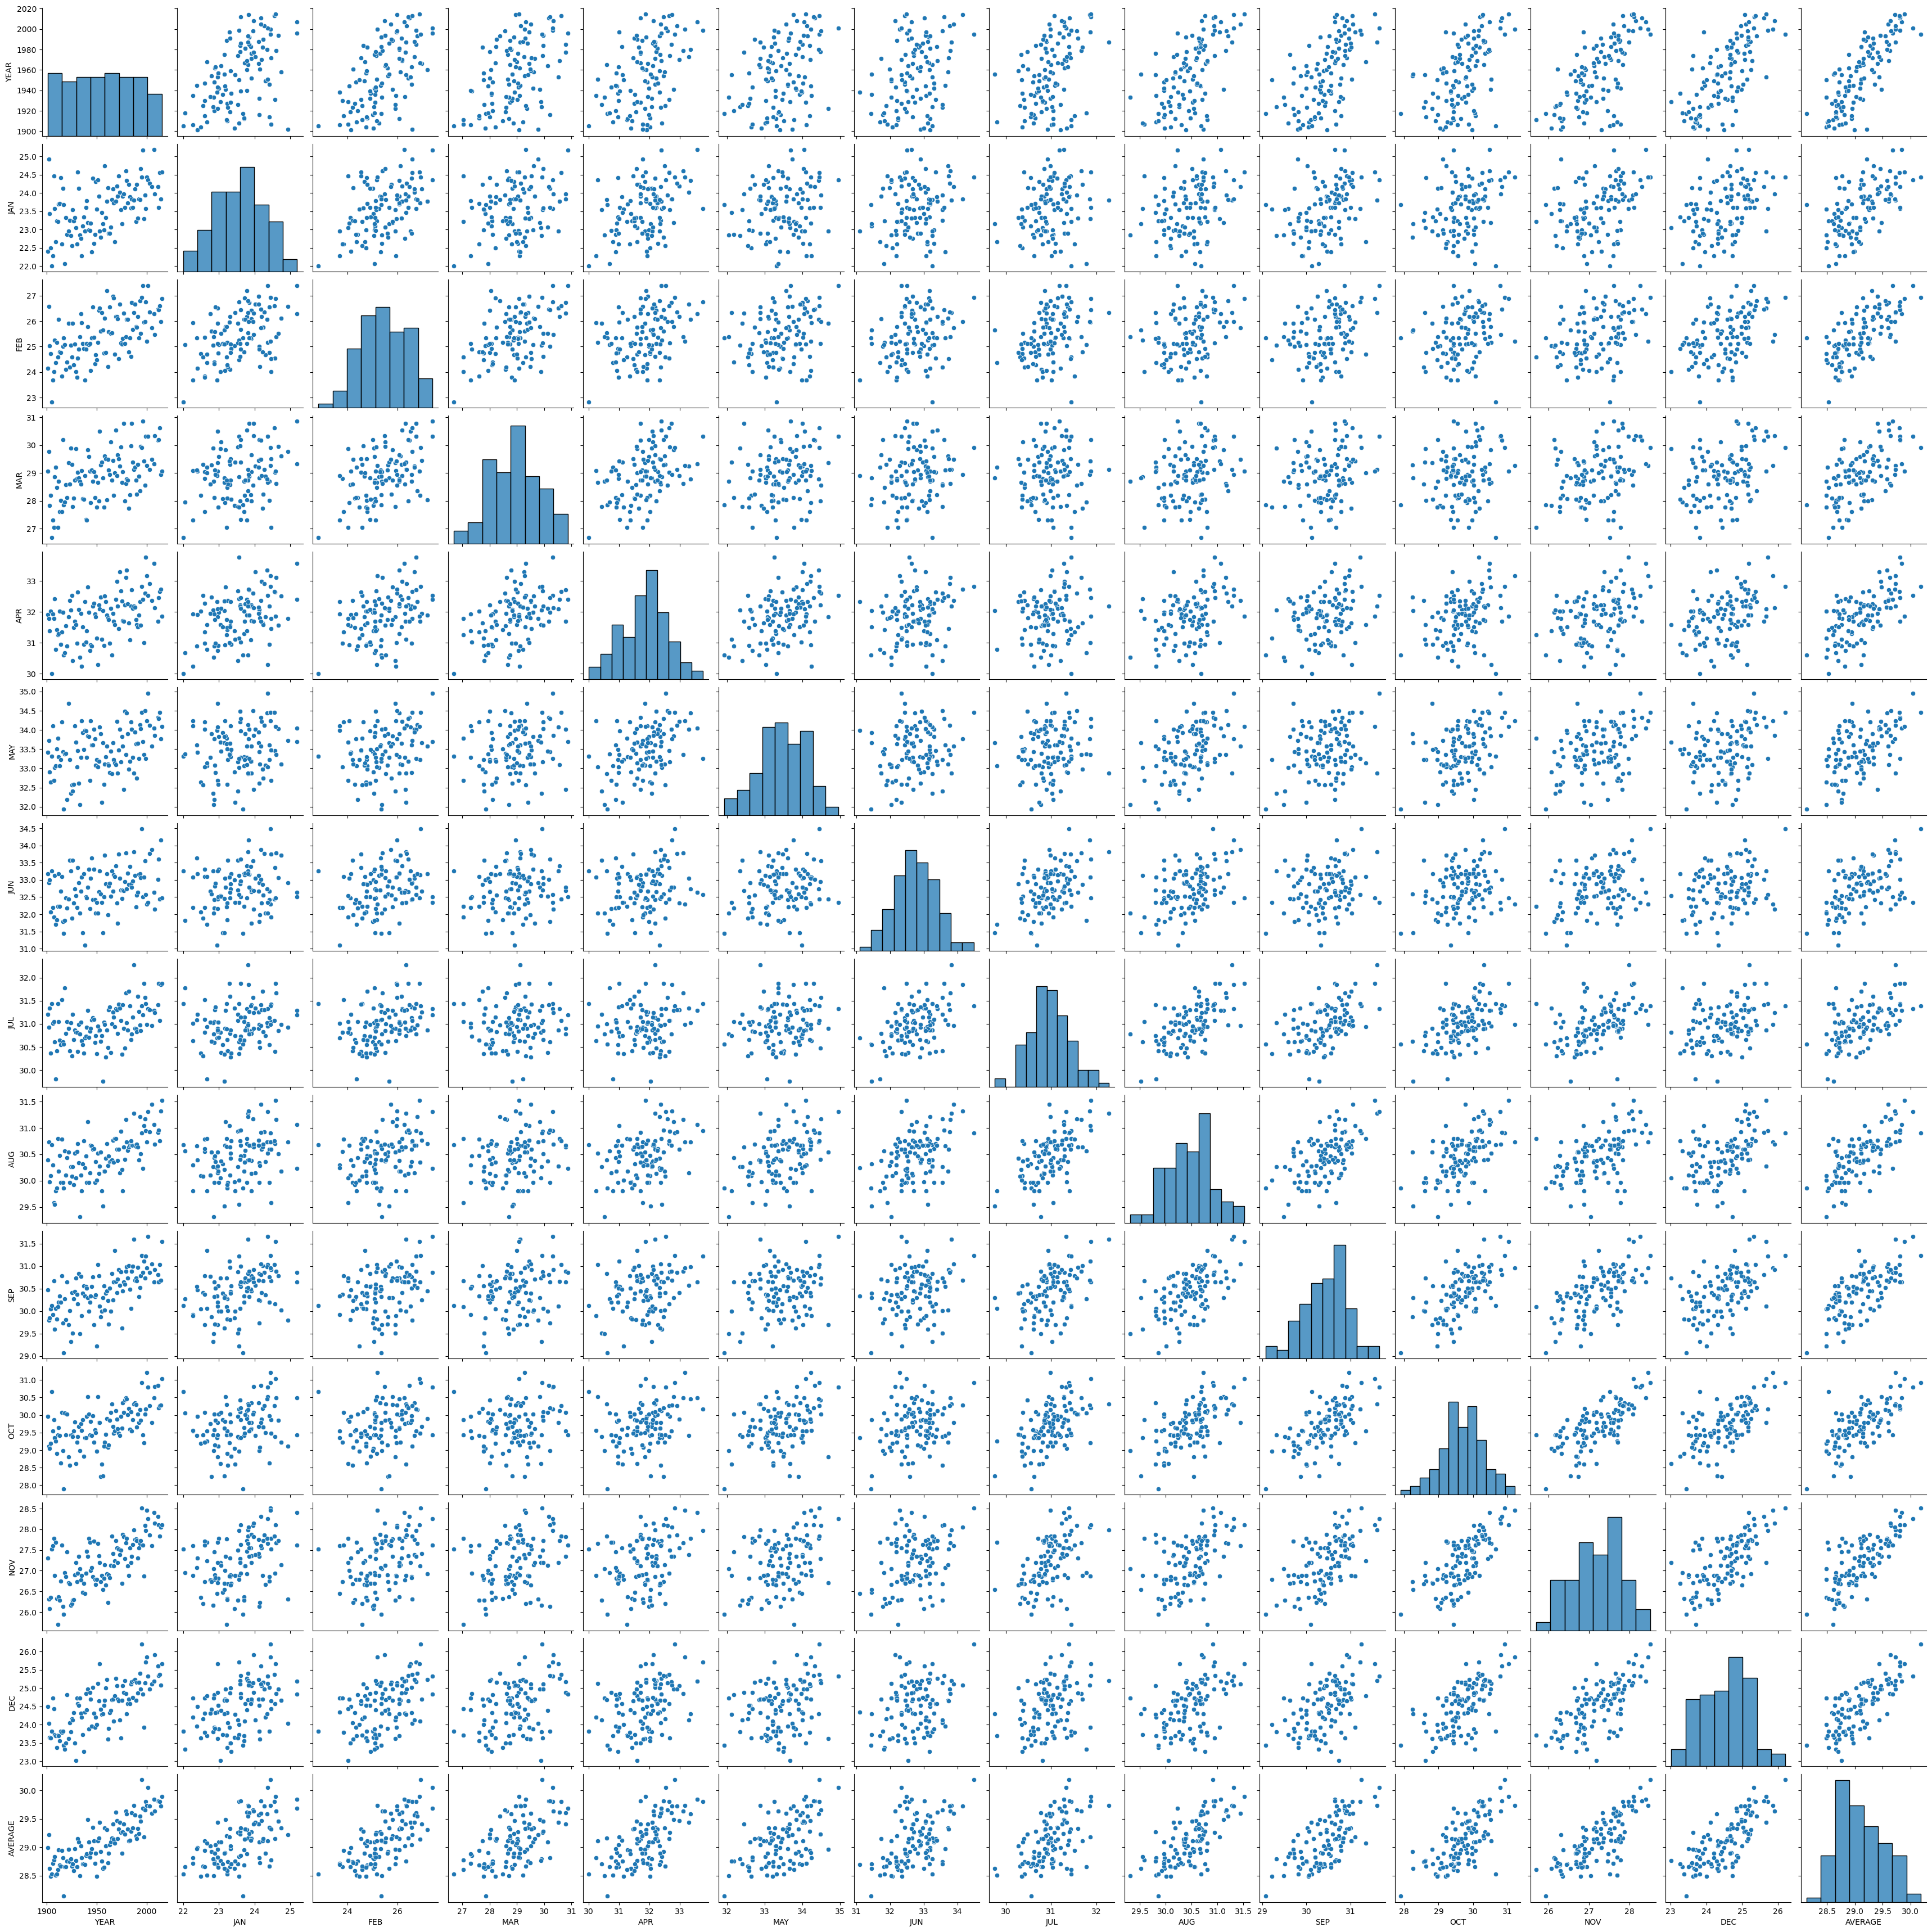

In [24]:
sns.pairplot(data)
plt.show()

Явное разбиение на кластеры не наблюдается, наиболее подходящим можно выбрать зависимость признака "DEC" от "NOV"
Рассмотрим график подробнее:

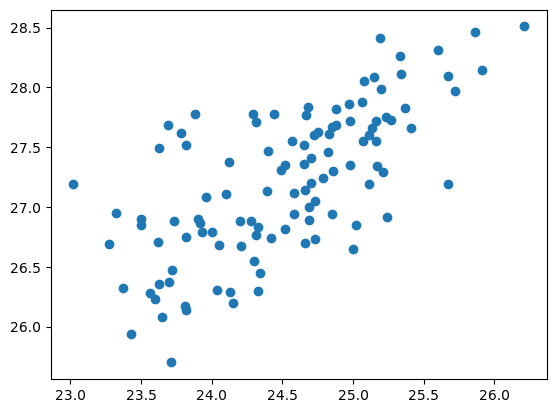

In [25]:
plt.scatter(data["DEC"],data["NOV"])

Визуально наблюдаем неявно выраженные кластеры

## Метод локтя

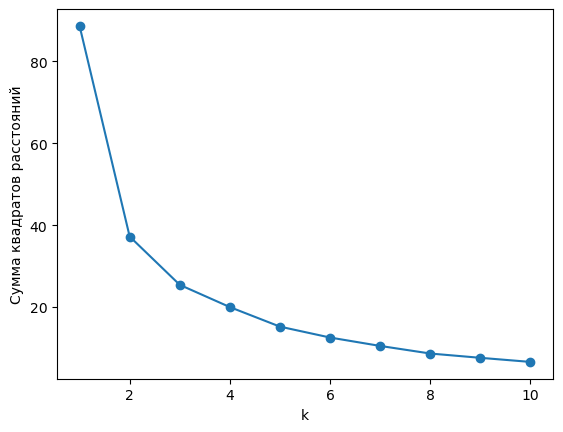

In [31]:
k_range = range(1, 11)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k, n_init = 10)
    km.fit(data[['DEC',"NOV"]])
    sse.append(km.inertia_)

plt.xlabel('k')
plt.ylabel('Сумма квадратов расстояний')

plt.plot(k_range, sse)
plt.scatter(k_range, sse)

## Кластеризация методом K-mean

Применим метод KMeans непосредственно для кластеризации:

In [32]:
km = KMeans(n_clusters = 5, n_init = 10)
y_predicted = km.fit_predict(data[["DEC","NOV"]])
data["cluster"] = y_predicted
data.head(5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,AVERAGE,cluster
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.995833,3
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.218333,4
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.628333,4
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.487500,4
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.528333,1


Получив разделение на кластеры, отобразим их для наглядности:

Text(0, 0.5, 'Annual Income')

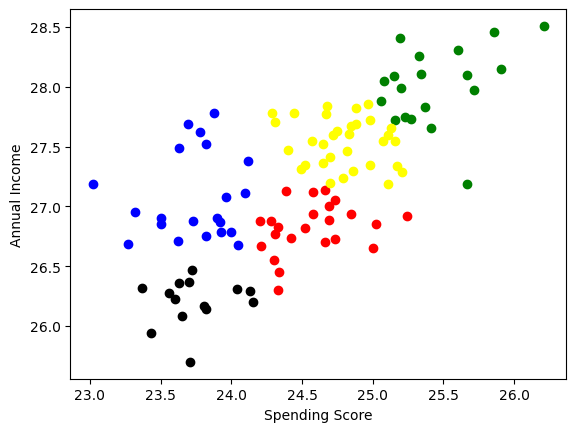

In [33]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]
data4 = data[data.cluster == 3]
data5 = data[data.cluster == 4]

plt.scatter(data1["DEC"], data1["NOV"], color='green')
plt.scatter(data2["DEC"], data2["NOV"], color='blue')
plt.scatter(data3["DEC"], data3["NOV"], color='red')
plt.scatter(data4["DEC"], data4["NOV"], color='yellow')
plt.scatter(data5["DEC"], data5["NOV"], color='black')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')

Каждый цвет обозначает соответствующий ему кластер. Предположение на основании графического метода оказалось справедливым.

## Вывод

В ходе исследования датасета о клиентах супермаркета были выполнены основные этапы предобработки данных и применен метод кластеризации KMeans.

В ходе исследования датасета о ежемесячной температуре в Индии были выполнены основные этапы предобработки данных и применен метод кластеризации KMeans.
Использование графических методов для определения оптимального количества кластеров позволило увидеть явно выраженные группы на графике зависимости "DEC" от "NOV". Метод локтя подтвердил предполагаемое количество кластеров.
Применение алгоритма KMeans кластеризации также выявило 5 неявно выраженных групп клиентов, что согласуется с графическими предположениями.
Визуализация кластеров на графике отобразила неявное разделение цветами на соответствующие кластеры, успешную кластеризацию данных.